In [10]:
import numpy as np # testing 123
import pandas as pd # write a comment somewhere
import matplotlib.pyplot as plt
import seaborn as sns
import io
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = all
from sklearn.impute import KNNImputer

In [11]:
df_trainvalue = pd.read_csv("data/Trainingsetvalues.csv")
df_trainlabel = pd.read_csv("data/Trainingsetlabels.csv")
df_testvalue=pd.read_csv("data/Testsetvalues.csv")

In [12]:
df_trainvalue.shape

(59400, 40)

In [13]:
df_testvalue.shape

(14850, 40)

In [14]:
combined=pd.concat([df_trainvalue,df_testvalue])
combined.head(10)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,...,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,...,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,...,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,0,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [15]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74250 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     74250 non-null  int64  
 1   amount_tsh             74250 non-null  float64
 2   date_recorded          74250 non-null  object 
 3   funder                 69746 non-null  object 
 4   gps_height             74250 non-null  int64  
 5   installer              69718 non-null  object 
 6   longitude              74250 non-null  float64
 7   latitude               74250 non-null  float64
 8   wpt_name               74250 non-null  object 
 9   num_private            74250 non-null  int64  
 10  basin                  74250 non-null  object 
 11  subvillage             73780 non-null  object 
 12  region                 74250 non-null  object 
 13  region_code            74250 non-null  int64  
 14  district_code          74250 non-null  int64  
 15  lg

In [16]:
combined.shape

(74250, 40)

<AxesSubplot:xlabel='status_group', ylabel='Count'>

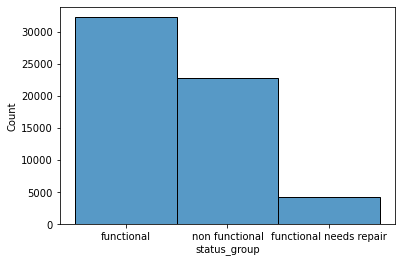

In [17]:
sns.histplot(df_trainlabel['status_group'])

In [18]:
combined.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,74250.000000,74250.000000,74250.000000,74250.000000,7.425000e+04,74250.000000,74250.000000,74250.000000,74250.000000,74250.000000
mean,37124.500000,318.685704,665.667313,34.074262,-5.701771e+00,0.462330,15.265414,5.629077,180.750828,1298.463650
std,21434.273081,2906.762364,692.761033,6.572519,2.944969e+00,11.537879,17.508907,9.641636,471.086120,952.349375
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18562.250000,0.000000,0.000000,33.086819,-8.525675e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37124.500000,0.000000,364.000000,34.907475,-5.026540e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55686.750000,20.000000,1317.000000,37.181685,-3.325058e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74249.000000,350000.000000,2777.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [19]:
combined.info

<bound method DataFrame.info of           id  amount_tsh date_recorded                  funder  gps_height  \
0      69572      6000.0    2011-03-14                   Roman        1390   
1       8776         0.0    2013-03-06                 Grumeti        1399   
2      34310        25.0    2013-02-25            Lottery Club         686   
3      67743         0.0    2013-01-28                  Unicef         263   
4      19728         0.0    2011-07-13             Action In A           0   
...      ...         ...           ...                     ...         ...   
14845  39307         0.0    2011-02-24                  Danida          34   
14846  18990      1000.0    2011-03-21                    Hiap           0   
14847  28749         0.0    2013-03-04                     NaN        1476   
14848  33492         0.0    2013-02-18                 Germany         998   
14849  68707         0.0    2013-02-13  Government Of Tanzania         481   

          installer  longitude 

In [20]:
def categorical_dqr(df):

  #select categorical columns
  categorical = df.select_dtypes(include = 'object').columns.tolist()

  #datatype
  data_types = pd.DataFrame(
    df[categorical].dtypes,
    columns=['Data Type'])
  
  #count
  count_values = pd.DataFrame(
      columns=['Records'])
  for row in list(combined[categorical].columns.values):
    count_values.loc[row] = [combined[categorical][row].count()]
  
   #missing data
  missing_data = pd.DataFrame(
    df[categorical].isnull().sum(),
    columns=['Missing Values'])
  
  #unique values
  unique_values = pd.DataFrame(
      columns=['Unique Values'])
  for row in list(combined[categorical].columns.values):
    unique_values.loc[row] = [combined[categorical][row].nunique()]

  #mode
  mode_values = pd.DataFrame(
      columns=['Mode'])
  for row in list(combined[categorical].columns.values): 
    mode_values.loc[row] = [combined[categorical][row].mode()[0]]
    mode = mode_values.loc[row]
  
  #mode frequency
  listModeFreq = []
  for row in categorical:
    mode = combined[row].mode().iat[0]
    ModeFreq = combined[row].value_counts()[mode]
    #print(x, mode, combined[x].value_counts()[mode])
    listModeFreq .append(ModeFreq )
  listModeFreq  = np.array(listModeFreq )
    
  
   #create data quality report
  dq_report_cat = data_types.join(missing_data).join(count_values).join(unique_values).join(mode_values)
  dq_report_cat['Mode freq.'] = listModeFreq 
  dq_report_cat['Mode %'] = (dq_report_cat['Mode freq.'] / dq_report_cat['Records']*100) .astype('float')
  dq_report_cat['Missing %'] = (dq_report_cat['Missing Values'] / len(combined[categorical]) *100)

  #change order of columns
  dq_report_cat = dq_report_cat[['Data Type', 'Records', 'Unique Values', 'Missing Values', 'Missing %', 'Mode', 'Mode freq.', 'Mode %']]
  dq_report_cat[['Missing %', 'Mode %']] =   dq_report_cat[['Missing %'	,  'Mode %']].round(1  )

  #return report
  return(dq_report_cat)

In [21]:
categorical_dqr = categorical_dqr(combined)
categorical_dqr

,Data Type,Records,Unique Values,Missing Values,Missing %,Mode,Mode freq.,Mode %
date_recorded,object,74250,369,0,0.0,2011-03-17,695,0.9
funder,object,69746,2140,4504,6.1,Government Of Tanzania,11299,16.2
installer,object,69718,2410,4532,6.1,DWE,21751,31.2
wpt_name,object,74250,45684,0,0.0,none,4440,6.0
basin,object,74250,9,0,0.0,Lake Victoria,12871,17.3
subvillage,object,73780,21425,470,0.6,Shuleni,646,0.9
region,object,74250,21,0,0.0,Iringa,6599,8.9
lga,object,74250,125,0,0.0,Njombe,3128,4.2
ward,object,74250,2098,0,0.0,Igosi,386,0.5
public_meeting,object,70095,2,4155,5.6,True,63749,90.9


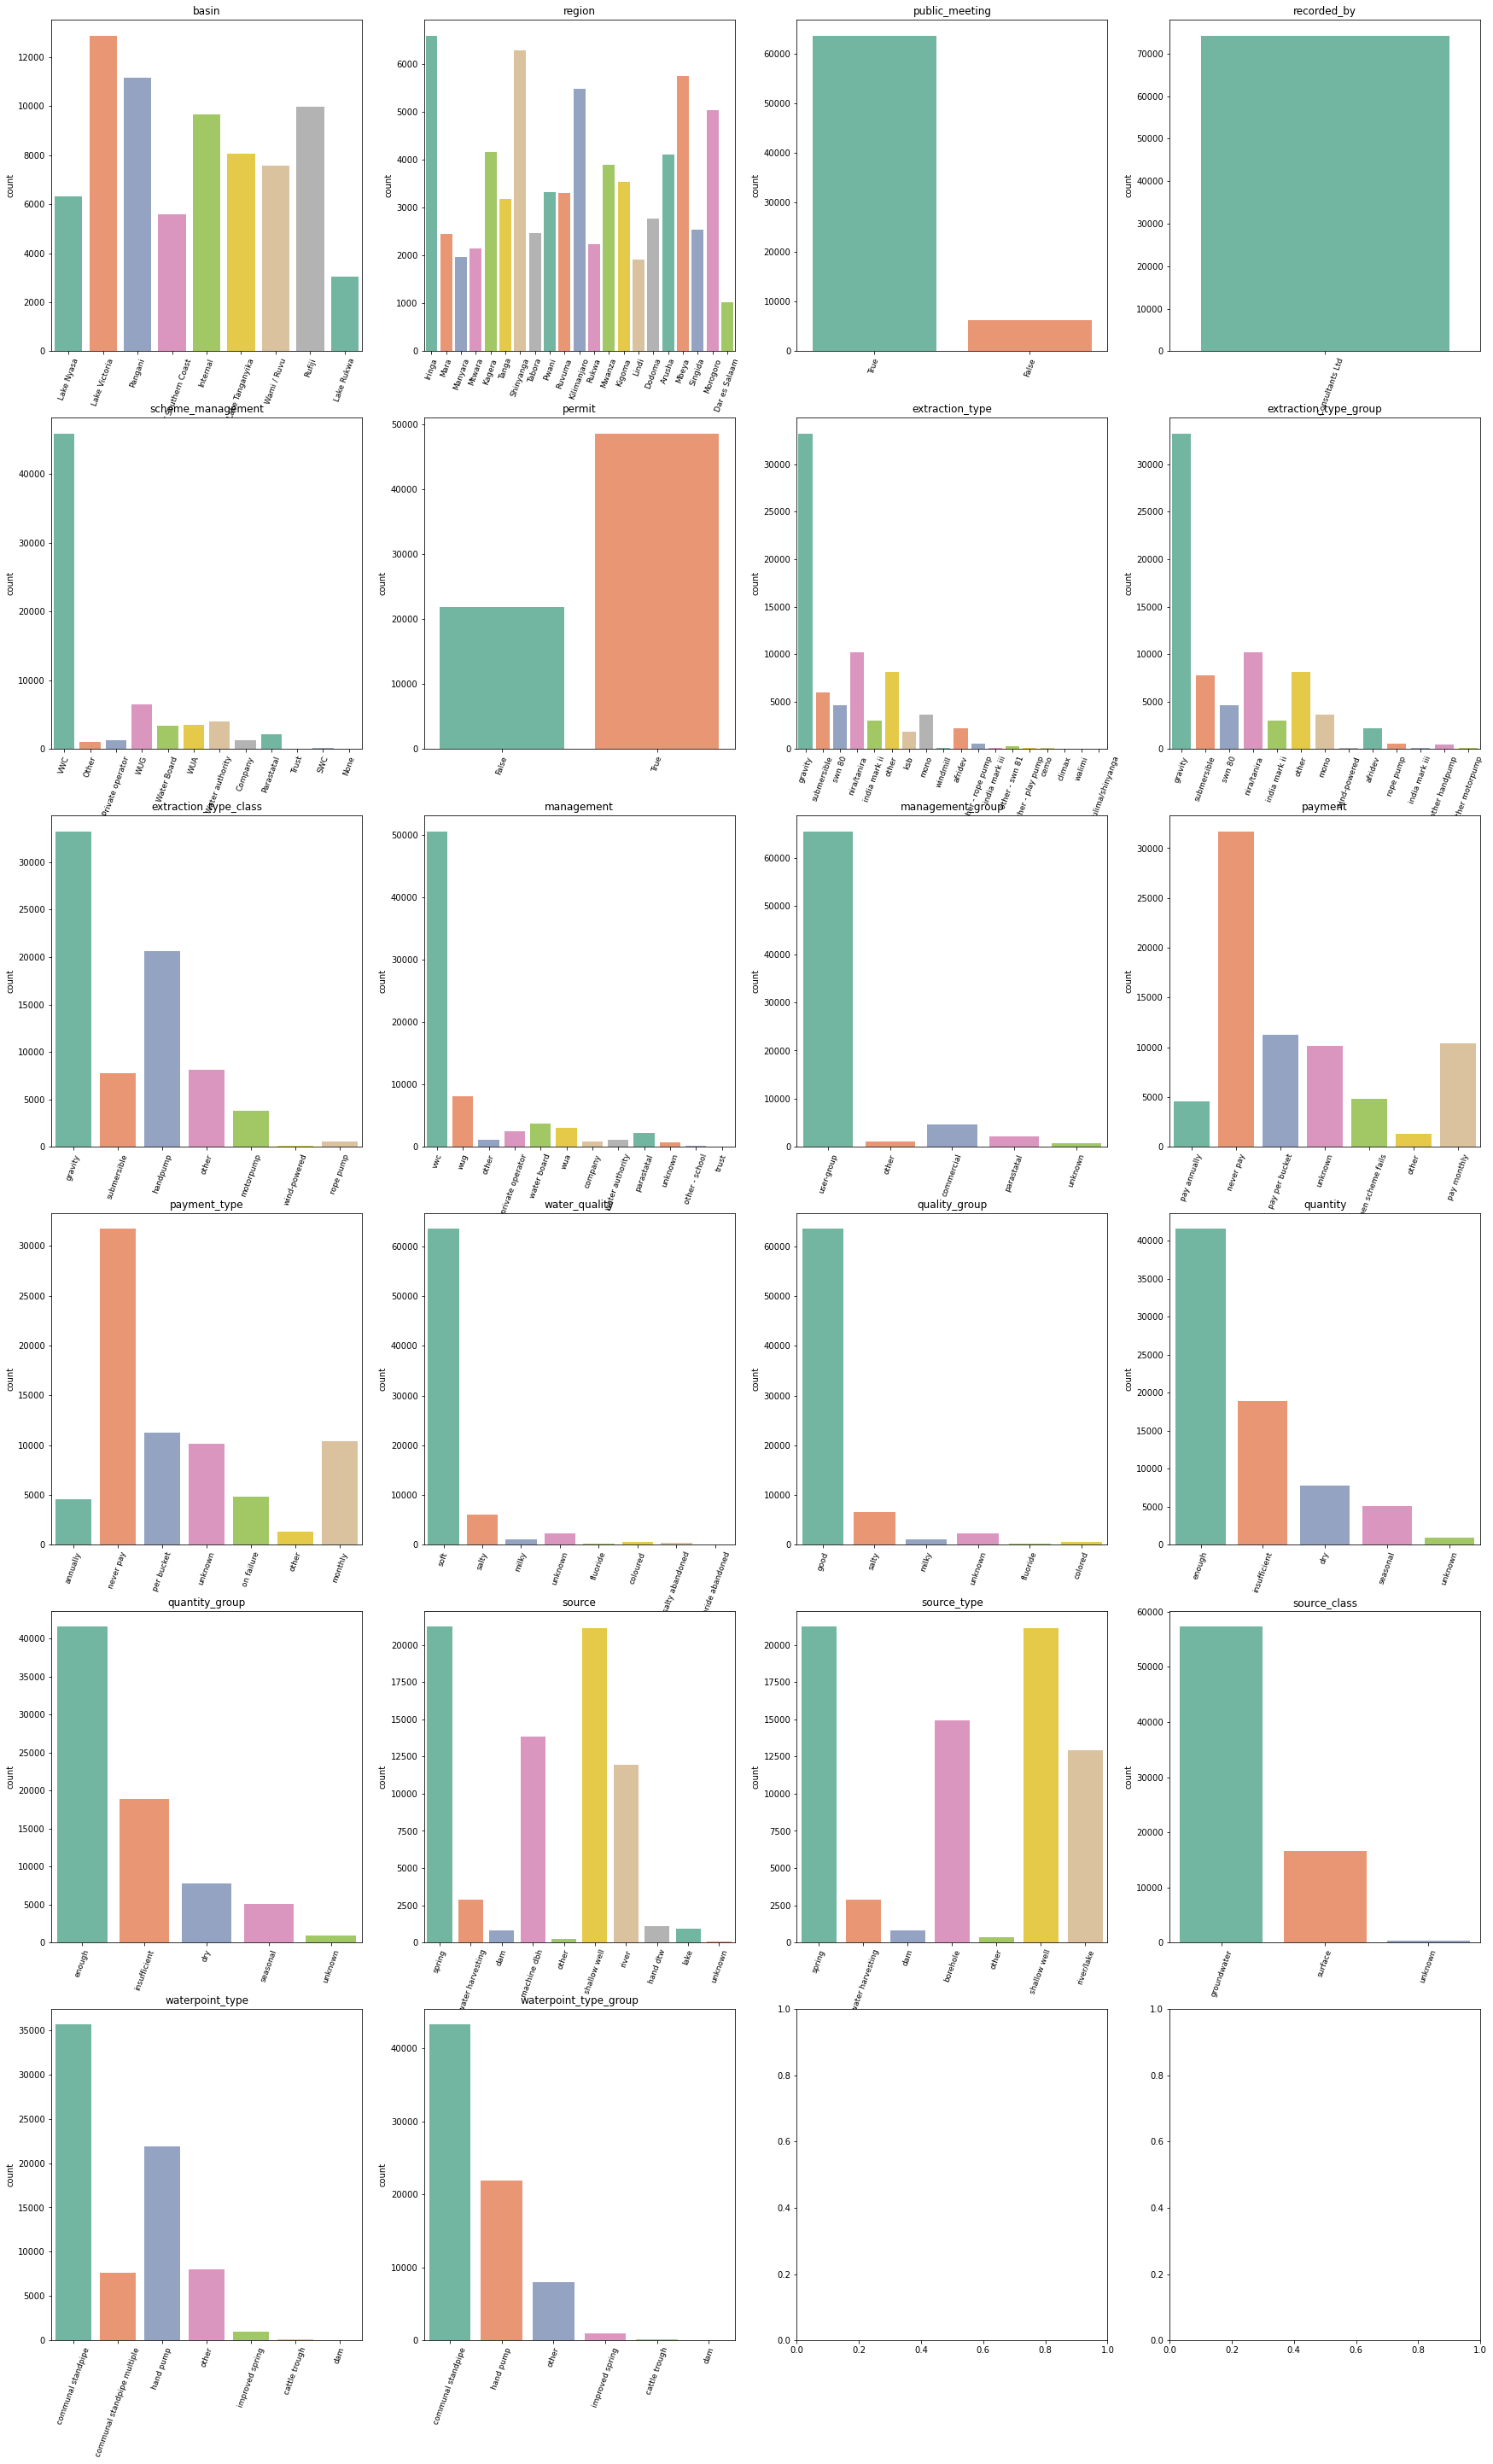

In [22]:
#create a list of categorical features with low cardinality
low_cardinal = categorical_dqr [categorical_dqr ['Unique Values'] <=50]
cardinal_index = low_cardinal.index
low_cardinal_list = cardinal_index.to_list()

def plots (dataset, feature, rows, columns):
    fig, axes = plt.subplots(nrows=rows,ncols=columns, figsize = (30,50))
    plot = 0
    for i in range(rows):
        for j in range(columns):
             ax = sns.countplot(data = dataset, x =feature[plot] , ax = axes[i][j], palette='Set2' )
             ax.set_title(feature[plot])
             ax.set_xlabel("")
             ax.set_xticklabels(ax.get_xticklabels(), rotation = 70, fontsize=9)
             plot +=1

#create plots
try:
    plots (combined, combined[low_cardinal_list].columns, 6,4)
except IndexError: 
    pass

## Data cleaning and missing data treatment

Change all categorical values to lower case to deal with inconsistencies in data recording

Removing duplicate/redundant columns to avoid multicollinearity 

In [23]:
#recorded_by # all values are GeoData Consultants Ltd
#waterpoint_type# same as waterpoint_type_group
#quantity # same as quantity_group
#payment # same meaning as payment_type
#extraction_type_class # already have extraction_type_group, which a subset with more detail

combined.drop(columns=['recorded_by','waterpoint_type','quantity','extraction_type_class','payment'],inplace=True )


Converting all data to lowercase to reduce formatting inconsitencies

In [24]:
combined = combined.applymap(lambda s: s.lower() if type(s) == str else s)

In [25]:
combined.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
management                object
management_group          object
payment_type              object
water_quality             object
quality_group             object
quantity_g

Fixing data formats

In [26]:
#convert faulty datatypes
combined[['region_code','district_code', 'num_private']] = combined[['region_code','district_code', 'num_private']].astype('object')

In [27]:
combined.head(20)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,management,management_group,payment_type,water_quality,quality_group,quantity_group,source,source_type,source_class,waterpoint_type_group
0,69572,6000.0,2011-03-14,roman,1390,roman,34.938093,-9.856322,none,0,...,vwc,user-group,annually,soft,good,enough,spring,spring,groundwater,communal standpipe
1,8776,0.0,2013-03-06,grumeti,1399,grumeti,34.698766,-2.147466,zahanati,0,...,wug,user-group,never pay,soft,good,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe
2,34310,25.0,2013-02-25,lottery club,686,world vision,37.460664,-3.821329,kwa mahundi,0,...,vwc,user-group,per bucket,soft,good,enough,dam,dam,surface,communal standpipe
3,67743,0.0,2013-01-28,unicef,263,unicef,38.486161,-11.155298,zahanati ya nanyumbu,0,...,vwc,user-group,never pay,soft,good,dry,machine dbh,borehole,groundwater,communal standpipe
4,19728,0.0,2011-07-13,action in a,0,artisan,31.130847,-1.825359,shuleni,0,...,other,other,never pay,soft,good,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe
5,9944,20.0,2011-03-13,mkinga distric coun,0,dwe,39.172796,-4.765587,tajiri,0,...,vwc,user-group,per bucket,salty,salty,enough,other,other,unknown,communal standpipe
6,19816,0.0,2012-10-01,dwsp,0,dwsp,33.362410,-3.766365,kwa ngomho,0,...,vwc,user-group,never pay,soft,good,enough,machine dbh,borehole,groundwater,hand pump
7,54551,0.0,2012-10-09,rwssp,0,dwe,32.620617,-4.226198,tushirikiane,0,...,wug,user-group,unknown,milky,milky,enough,shallow well,shallow well,groundwater,hand pump
8,53934,0.0,2012-11-03,wateraid,0,water aid,32.711100,-5.146712,kwa ramadhan musa,0,...,vwc,user-group,never pay,salty,salty,seasonal,machine dbh,borehole,groundwater,hand pump
9,46144,0.0,2011-08-03,isingiro ho,0,artisan,30.626991,-1.257051,kwapeto,0,...,vwc,user-group,never pay,soft,good,enough,shallow well,shallow well,groundwater,hand pump


Fixing data formatting and spelling variances

In [28]:
# import sys
# !{sys.executable} -m pip install string_grouper

# Counting the unique values for each categorical column, including missing values

In [29]:
cat= combined.select_dtypes(include='object')
unique_values = cat.nunique(dropna=False)
print(unique_values)


date_recorded              369
funder                    2141
installer                 2163
wpt_name                 45683
num_private                 68
basin                        9
subvillage               21426
region                      21
region_code                 27
district_code               20
lga                        125
ward                      2098
public_meeting               3
scheme_management           13
scheme_name               2723
permit                       3
extraction_type             18
extraction_type_group       13
management                  12
management_group             5
payment_type                 7
water_quality                8
quality_group                6
quantity_group               5
source                      10
source_type                  7
source_class                 3
waterpoint_type_group        6
dtype: int64


Lets address missing data first

In [30]:
combined.isnull().sum().sort_values(ascending=False)

scheme_name              35258
scheme_management         4846
installer                 4532
funder                    4504
public_meeting            4155
permit                    3793
subvillage                 470
management_group             0
construction_year            0
extraction_type              0
extraction_type_group        0
management                   0
id                           0
water_quality                0
quality_group                0
quantity_group               0
source                       0
source_type                  0
source_class                 0
payment_type                 0
population                   0
amount_tsh                   0
ward                         0
lga                          0
district_code                0
region_code                  0
region                       0
basin                        0
num_private                  0
wpt_name                     0
latitude                     0
longitude                    0
gps_heig

In [31]:
missing_col = [col for col in combined.columns if combined[col].isnull().any()]
missing_col

['funder',
 'installer',
 'subvillage',
 'public_meeting',
 'scheme_management',
 'scheme_name',
 'permit']

**Funder Column**

In [32]:
combined['funder'].unique()

array(['roman', 'grumeti', 'lottery club', ..., 'nyamigogo',
       'village fou', 'velem'], dtype=object)

In [33]:
combined['funder'].nunique()

2140

In [34]:
combined['funder'].fillna(value='Other',inplace=True)
combined['funder'].replace(to_replace = '0', value ='Other' , inplace=True)
# filling 0 and null values with Other

In [35]:
sum(combined['funder']=='Other')

5484

**Installer Column**

In [36]:
combined['installer'].unique()

array(['roman', 'grumeti', 'world vision', ..., 'banane',
       'majija charles', 'central government/tlc'], dtype=object)

In [37]:
combined['installer'].nunique()

2162

In [38]:
combined['installer'].fillna(value='Other',inplace=True)
combined['installer'].replace(to_replace = '0', value ='Other' , inplace=True)
# filling 0 and null values with Other

In [39]:
sum(combined['installer']=='Other')

5512

In [40]:
combined['installer'].head(20)

0                    roman
1                  grumeti
2             world vision
3                   unicef
4                  artisan
5                      dwe
6                     dwsp
7                      dwe
8                water aid
9                  artisan
10                 private
11                  danida
12            world vision
13    lawatefuka water sup
14                  wedeco
15                     dwe
16                     dwe
17                     dwe
18                     dwe
19                   danid
Name: installer, dtype: object

In [41]:
#pip install string-grouper
#from string_grouper import group_similar_strings
#group_similar_strings(combined['installer'],n_blocks = (1,200))

**Subvillage Column**

In [42]:
combined['subvillage'].unique()

array(['mnyusi b', 'nyamara', 'majengo', ..., 'kabita', 'nyamalonda',
       'kosoro'], dtype=object)

In [43]:
combined['subvillage'].nunique()

21425

In [44]:
combined['subvillage'].fillna(value='Other',inplace=True)
combined['subvillage'].replace(to_replace = '0', value ='Other' , inplace=True)
# filling 0 and null values with Other

In [45]:
sum(combined['subvillage']=='Other')

470

scheme_name column

In [46]:
combined['scheme_name'].unique()

array(['roman', nan, 'nyumba ya mungu pipe scheme', ...,
       'bl eligad branch line', 'lumeyakalebezo nyehunge water project',
       'bl vetenary'], dtype=object)

In [47]:
combined['scheme_name'].nunique()

2722

In [48]:
combined['scheme_name'].fillna(value='Other',inplace=True)
combined['scheme_name'].replace(to_replace = '0', value ='Other' , inplace=True)
# filling 0 and null values with Other

In [49]:
sum(combined['scheme_name']=='Other')

35258

**scheme_management**

In [50]:
combined['scheme_management'].unique()

array(['vwc', 'other', nan, 'private operator', 'wug', 'water board',
       'wua', 'water authority', 'company', 'parastatal', 'trust', 'swc',
       'none'], dtype=object)

In [51]:
combined['scheme_management'].nunique()

12

In [52]:
combined['scheme_management'].fillna(value='Other',inplace=True)
combined['scheme_management'].replace(to_replace = '0', value ='Other' , inplace=True)
# filling 0 and null values with Other

In [53]:
sum(combined['scheme_management']=='Other')

4846

**public_meeting columns**

In [54]:
combined['public_meeting'].unique()

array([True, nan, False], dtype=object)

In [55]:
combined['public_meeting'].nunique()

2

In [56]:
combined['public_meeting'].fillna(value='Other',inplace=True)
combined['public_meeting'].replace(to_replace = '0', value ='Other' , inplace=True)
# filling 0 and null values with Other

**permit** **column**

In [57]:
combined['permit'].unique()

array([False, True, nan], dtype=object)

In [58]:
combined['permit'].nunique()

2

In [59]:
combined['permit'].fillna(value='Other',inplace=True)
combined['permit'].replace(to_replace = '0', value ='Other' , inplace=True)
# filling 0 and null values with Other

Recheck Missing Values

In [60]:
combined.isnull().sum().sort_values(ascending=False)

id                       0
management_group         0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
management               0
payment_type             0
public_meeting           0
water_quality            0
quality_group            0
quantity_group           0
source                   0
source_type              0
source_class             0
scheme_management        0
population               0
amount_tsh               0
wpt_name                 0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
num_private              0
ward                     0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
waterpoint_type_group    0
dtype: int64

In [61]:
combined.describe

<bound method NDFrame.describe of           id  amount_tsh date_recorded                  funder  gps_height  \
0      69572      6000.0    2011-03-14                   roman        1390   
1       8776         0.0    2013-03-06                 grumeti        1399   
2      34310        25.0    2013-02-25            lottery club         686   
3      67743         0.0    2013-01-28                  unicef         263   
4      19728         0.0    2011-07-13             action in a           0   
...      ...         ...           ...                     ...         ...   
14845  39307         0.0    2011-02-24                  danida          34   
14846  18990      1000.0    2011-03-21                    hiap           0   
14847  28749         0.0    2013-03-04                   Other        1476   
14848  33492         0.0    2013-02-18                 germany         998   
14849  68707         0.0    2013-02-13  government of tanzania         481   

          installer  longitud

Lets check for unique values again

In [62]:
cat= combined.select_dtypes(include='object')
unique_values = cat.nunique(dropna=False)
unique_values.sort_values(ascending=False)

wpt_name                 45683
subvillage               21426
scheme_name               2723
installer                 2162
funder                    2140
ward                      2098
date_recorded              369
lga                        125
num_private                 68
region_code                 27
region                      21
district_code               20
extraction_type             18
extraction_type_group       13
scheme_management           13
management                  12
source                      10
basin                        9
water_quality                8
payment_type                 7
source_type                  7
quality_group                6
waterpoint_type_group        6
management_group             5
quantity_group               5
permit                       3
public_meeting               3
source_class                 3
dtype: int64

There are still many unique values for each categorical variables. Lets try to better understand the large ones

In [63]:
df_subvillage= combined.groupby(['subvillage'], as_index=False).count()[['subvillage', 'id']]
df_subvillage.sort_values(by='id',ascending=False)
#['subvillage'].sort_values(ascending=False)

,subvillage,id
19643,shuleni,646
10097,majengo,631
9767,madukani,629
39,Other,470
5765,kati,467
...,...,...
5884,kayenza,1
5883,kayengele a,1
14040,mue,1
14041,muembeni,1


In [64]:
#lets take waterpoint names that occur atleast X times, assuming the rest have little significance, will be clubbed to others

In [65]:
# # waterpoint names with less than 5 pumps, will be renamed to Other # check 5 and 10
# other_subvillage = df_subvillage[df_subvillage.id<50].subvillage.unique()
# combined['subvillage'] = combined['subvillage'].apply(lambda x : x if (x not in other_subvillage)  else 'Other')

In [66]:
# def top_20 (var):
#     top20=combined[var].value_counts().head(21).index
#     combined[var] = combined[var].apply(lambda x : x if (x in top20)  else 'Other')

# combined['subvillage'] = combined['subvillage'].apply(top_20)

top20_wpt_name=combined['wpt_name'].value_counts().head(20).index
print(top20_wpt_name)
combined['wpt_name'] = combined['wpt_name'].apply(lambda x : x if (x in top20_wpt_name)  else 'Other')

top20_subvillage=combined['subvillage'].value_counts().head(20).index
print(top20_subvillage)
combined['subvillage'] = combined['subvillage'].apply(lambda x : x if (x in top20_subvillage)  else 'Other')

top20_funder=combined['funder'].value_counts().head(20).index
print(top20_funder)
combined['funder'] = combined['funder'].apply(lambda x : x if (x in top20_funder)  else 'Other')

top20_installer=combined['installer'].value_counts().head(20).index
print(top20_installer)
combined['installer'] = combined['installer'].apply(lambda x : x if (x in top20_installer)  else 'Other')

top20_scheme_name=combined['scheme_name'].value_counts().head(20).index
print(top20_scheme_name)
combined['scheme_name'] = combined['scheme_name'].apply(lambda x : x if (x in top20_scheme_name)  else 'Other')

top20_ward=combined['ward'].value_counts().head(20).index
print(top20_ward)
combined['ward'] = combined['ward'].apply(lambda x : x if (x in top20_ward)  else 'Other')


Index(['none', 'shuleni', 'zahanati', 'msikitini', 'kanisani', 'sokoni',
       'bombani', 'ofisini', 'school', 'shule ya msingi', 'shule', 'sekondari',
       'muungano', 'mkombozi', 'upendo', 'madukani', 'kituo cha afya',
       'mbugani', 'umoja', 'mkuyuni'],
      dtype='object')
Index(['shuleni', 'majengo', 'madukani', 'Other', 'kati', 'mtakuja', 'sokoni',
       'm', 'muungano', 'mbuyuni', 'songambele', 'mlimani', 'miembeni',
       'msikitini', '1', 'kanisani', 'kibaoni', 'mjini', 'mjimwema',
       'mapinduzi'],
      dtype='object')
Index(['government of tanzania', 'Other', 'danida', 'hesawa', 'rwssp',
       'world bank', 'kkkt', 'world vision', 'unicef', 'tasaf', 'dhv',
       'district council', 'private individual', 'dwsp', 'norad',
       'germany republi', 'water', 'tcrs', 'ministry of water', 'dwe'],
      dtype='object')
Index(['dwe', 'Other', 'government', 'hesawa', 'rwe', 'commu', 'danida',
       'district council', 'kkkt', 'central government', 'tcrs',
       'worl

In [67]:
# let repeat for other columns, taking categories that have atleast 50 pumps

In [68]:
# df_subvillage= combined.groupby(['subvillage'], as_index=False).count()[['subvillage', 'id']]
# other_subvillage = df_subvillage[df_subvillage.id<50].subvillage.unique()
# combined['subvillage'] = combined['subvillage'].apply(lambda x : x if (x not in other_subvillage)  else 'Other')

# df_scheme_name= combined.groupby(['scheme_name'], as_index=False).count()[['scheme_name', 'id']]
# other_scheme_name = df_scheme_name[df_scheme_name.id<50].scheme_name.unique()
# combined['scheme_name'] = combined['scheme_name'].apply(lambda x : x if (x not in other_scheme_name)  else 'Other')

# df_installer= combined.groupby(['installer'], as_index=False).count()[['installer', 'id']]
# other_installer = df_installer[df_installer.id<50].installer.unique()
# combined['installer'] = combined['installer'].apply(lambda x : x if (x not in other_installer)  else 'Other')

# df_funder= combined.groupby(['funder'], as_index=False).count()[['funder', 'id']]
# other_funder = df_funder[df_funder.id<50].funder.unique()
# combined['funder'] = combined['funder'].apply(lambda x : x if (x not in other_funder)  else 'Other')

# df_ward= combined.groupby(['ward'], as_index=False).count()[['ward', 'id']]
# other_ward = df_ward[df_ward.id<80].ward.unique()
# combined['ward'] = combined['ward'].apply(lambda x : x if (x not in other_ward)  else 'Other')


In [69]:
#lets check for unique values again

cat= combined.select_dtypes(include='object')
unique_values = cat.nunique(dropna=False)
unique_values.sort_values(ascending=False)

#substantially reduced

date_recorded            369
lga                      125
num_private               68
region_code               27
wpt_name                  21
ward                      21
region                    21
district_code             20
funder                    20
scheme_name               20
subvillage                20
installer                 20
extraction_type           18
scheme_management         13
extraction_type_group     13
management                12
source                    10
basin                      9
water_quality              8
source_type                7
payment_type               7
quality_group              6
waterpoint_type_group      6
quantity_group             5
management_group           5
permit                     3
public_meeting             3
source_class               3
dtype: int64

Feature Engineering

In [82]:
combined[["year", "month", "day"]] = combined['date_recorded'].str.split("-", expand = True)

combined['age'] = np.where(combined.construction_year > 0, combined.year.astype(int) - combined.construction_year, 0)

print(combined['age'].describe())

combined['age'] = np.where(combined.age <= 0,None, combined.age)

combined['age'].to_csv('what')

count    74250.000000
mean         9.945966
std         12.418682
min         -7.000000
25%          0.000000
50%          4.000000
75%         16.000000
max         53.000000
Name: age, dtype: float64


In [83]:
combined.groupby('region', as_index=False).age.mean()

,region,age
0,arusha,14.218531
1,dar es salaam,11.832000
2,dodoma,NaN
3,iringa,13.789151
4,kagera,NaN
5,kigoma,15.058116
6,kilimanjaro,16.674513
7,lindi,18.146547
8,manyara,10.785824
9,mara,15.451339


In [81]:
combined[combined.age != 0]['age'].mean()

15.535065208245689

In [ ]:
combined['age'][''] = df.construction_year.replace(0.0, 2000)

In [72]:
#lets combine, too many

def get_age_group(x):
    if x <= 17:
        return 'new'
    elif x > 17 and x <=34:
        return 'middle'
    else:
        return 'old'

# Create new feature age_group
combined['age_group'] = combined['age'].apply(get_age_group)

combined['age_group']

0           new
1           new
2           new
3        middle
4           old
          ...  
14845    middle
14846       new
14847       new
14848       new
14849       new
Name: age_group, Length: 74250, dtype: object

# does seasonal weather pattern play a part?


In [65]:
import datetime
from datetime import date

combined['date_recorded'] = pd.to_datetime(combined['date_recorded'])
combined['month'] = combined['date_recorded'].dt.strftime('%b')
combined

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quantity_group,source,source_type,source_class,waterpoint_type_group,year,month,day,age,age_group
0,69572,6000.0,2011-03-14,Other,1390,Other,34.938093,-9.856322,none,0,...,enough,spring,spring,groundwater,communal standpipe,2011,Mar,14,12,new
1,8776,0.0,2013-03-06,Other,1399,Other,34.698766,-2.147466,zahanati,0,...,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,2013,Mar,06,3,new
2,34310,25.0,2013-02-25,Other,686,world vision,37.460664,-3.821329,Other,0,...,enough,dam,dam,surface,communal standpipe,2013,Feb,25,4,new
3,67743,0.0,2013-01-28,unicef,263,Other,38.486161,-11.155298,Other,0,...,dry,machine dbh,borehole,groundwater,communal standpipe,2013,Jan,28,27,middle
4,19728,0.0,2011-07-13,Other,0,Other,31.130847,-1.825359,shuleni,0,...,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,2011,Jul,13,2011,old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,danida,34,Other,38.852669,-6.582841,Other,0,...,enough,river,river/lake,surface,communal standpipe,2011,Feb,24,23,middle
14846,18990,1000.0,2011-03-21,Other,0,Other,37.451633,-5.350428,Other,0,...,insufficient,shallow well,shallow well,groundwater,hand pump,2011,Mar,21,17,new
14847,28749,0.0,2013-03-04,Other,1476,Other,34.739804,-4.585587,Other,0,...,insufficient,dam,dam,surface,communal standpipe,2013,Mar,04,3,new
14848,33492,0.0,2013-02-18,Other,998,dwe,35.432732,-10.584159,Other,0,...,insufficient,river,river/lake,surface,communal standpipe,2013,Feb,18,4,new


In [66]:
#lets convert month to Tanzanian seasons
#https://www.nathab.com/know-before-you-go/african-safaris/east-africa/weather-climate/tanzania/#:~:text=There%20are%20two%20rainy%20seasons,lasts%20from%20May%20to%20October.

def get_sasons(x):
    if x == 'Jan':
        return 'Warm'
    elif x == 'Feb':
        return 'Warm'
    elif x == 'Mar':
        return 'Warm'
    elif x == 'Apr':
        return 'Heavy Rain'
    elif x == 'May':
        return 'Heavy Rain'
    elif x == 'Jun':
        return 'Dry'
    elif x == 'Jul':
        return 'Dry'
    elif x == 'Aug':
        return 'Dry'
    elif x == 'Sep':
        return 'Dry'
    elif x == 'Oct':
        return 'Dry'
    elif x == 'Nov':
        return 'Moderate Rain'
    else:
        return 'Moderate Rain'

# Create new feature age_group
combined['Seasonal_weather'] = combined['month'].apply(get_sasons)

combined['Seasonal_weather']

0        Warm
1        Warm
2        Warm
3        Warm
4         Dry
         ... 
14845    Warm
14846    Warm
14847    Warm
14848    Warm
14849    Warm
Name: Seasonal_weather, Length: 74250, dtype: object

In [67]:
df_cleaned=combined.copy()

<AxesSubplot:>

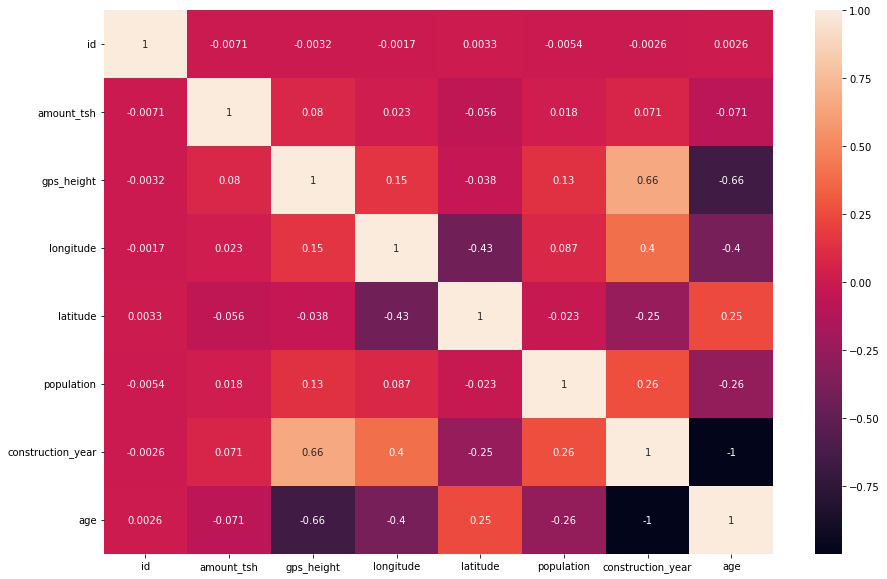

In [68]:
plt.figure(figsize=(15,10))
sns.heatmap(df_cleaned.corr(),annot=True)

Looking at the Numerical Data

In [ ]:
num=df_cleaned.select_dtypes(include=['float64','int64'])
num.shape
num.head()

,id,amount_tsh,gps_height,longitude,latitude,population,construction_year,age
0,69572,6000.0,1390,34.938093,-9.856322,109,1999,12
1,8776,0.0,1399,34.698766,-2.147466,280,2010,3
2,34310,25.0,686,37.460664,-3.821329,250,2009,4
3,67743,0.0,263,38.486161,-11.155298,58,1986,27
4,19728,0.0,0,31.130847,-1.825359,0,0,2011


In [ ]:
for col in num.columns:
    print (len(num[col].unique()))

74250
102
2456
71870
71869
1128
55
65


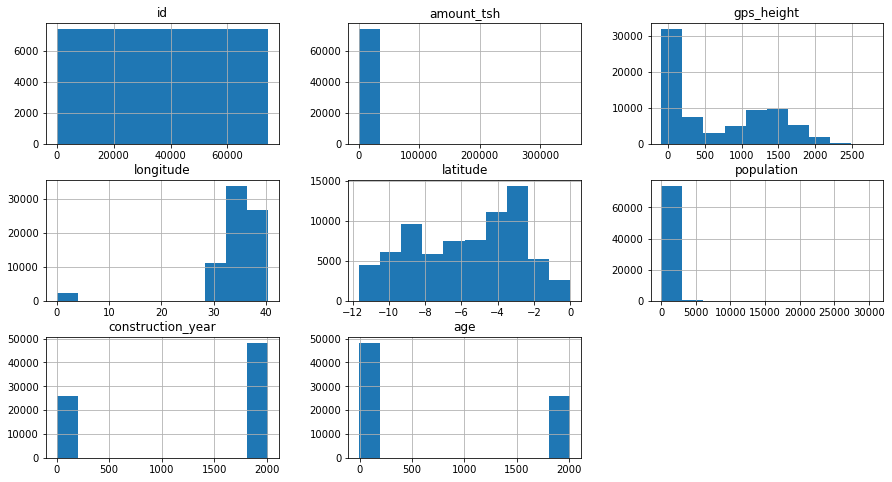

In [ ]:
num.select_dtypes(exclude=['object', 'bool']).hist(figsize = (15,8));


In [ ]:
# importing minmax scaler 
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#num[['amount_tsh', 'gps_height', 'population']] = scaler.fit_transform(num[['amount_tsh', 'gps_height', 'population']])
#num.head()

from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
num[['amount_tsh', 'gps_height', 'population','latitude','longitude']] = sc.fit_transform(num[['amount_tsh', 'gps_height', 'population','latitude','longitude']])

c:\Users\shifa\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [ ]:
# Categorical Features

In [ ]:
cat= df_cleaned.select_dtypes(include='object')
cat.shape

(74250, 32)

In [ ]:
for col in cat.columns:
    print (len(cat[col].unique()))

167
144
54
68
9
86
21
27
20
125
175
3
13
129
3
18
13
12
5
7
8
6
5
10
7
3
6
3
12
4


In [ ]:
#cat.drop(['date_recorded'],axis=1, inplace=True)
#combined.drop(['district_code'],axis=1, inplace=True)


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#oh_encoder=OneHotEncoder(handle_unknown='ignore',sparse=False)
#oh_cols=pd.DataFrame(oh_encoder.fit_transform(cat))
cat_final=pd.get_dummies(cat, drop_first=True)
cat_final.shape

(74250, 533)

In [ ]:
cat_final.head()

,funder_danida,funder_dhv,funder_district council,funder_dwe,funder_dwsp,funder_germany republi,funder_government of tanzania,funder_hesawa,funder_kkkt,funder_ministry of water,...,day_27,day_28,day_29,day_30,day_31,age_group_new,age_group_old,Seasonal_weather_Heavy Rain,Seasonal_weather_Moderate Rain,Seasonal_weather_Warm
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
final=pd.concat([cat_final, num], axis=1)
final.shape

(74250, 541)

In [ ]:
final.head()

,funder_danida,funder_dhv,funder_district council,funder_dwe,funder_dwsp,funder_germany republi,funder_government of tanzania,funder_hesawa,funder_kkkt,funder_ministry of water,...,Seasonal_weather_Moderate Rain,Seasonal_weather_Warm,id,amount_tsh,gps_height,longitude,latitude,population,construction_year,age
0,0,0,0,0,0,0,0,0,0,0,...,0,1,69572,1.954529,1.045581,0.131432,-1.410738,-0.152310,1999,12
1,0,0,0,0,0,0,0,0,0,0,...,0,1,8776,-0.109637,1.058572,0.095018,1.206916,0.210683,2010,3
2,0,0,0,0,0,0,0,0,0,0,...,0,1,34310,-0.101036,0.029350,0.515240,0.638531,0.147000,2009,4
3,0,0,0,0,0,0,0,0,0,0,...,0,1,67743,-0.109637,-0.581254,0.671269,-1.851824,-0.260572,1986,27
4,0,0,0,0,0,0,0,0,0,0,...,0,0,19728,-0.109637,-0.960897,-0.447840,1.316292,-0.383692,0,2011


In [ ]:
target_status_group = {'functional':0, 
                   'non functional':1, 
                   'functional needs repair':2} 
df_trainlabel['status_group'] = df_trainlabel['status_group'].replace(target_status_group)
df_trainlabel['status_group'].value_counts()

0    32259
1    22824
2     4317
Name: status_group, dtype: int64

In [ ]:
X=final[0:59400]
y=df_trainlabel['status_group']
sub_X=final[59400:]

In [ ]:
X.shape

(59400, 541)

In [ ]:
sub_X.shape

(14850, 541)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#drop Id column from training and test

X.drop(['id'],axis=1, inplace=True)
sub_X.drop(['id'],axis=1, inplace=True)

c:\Users\shifa\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, roc_auc_score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y, random_state=6)

In [ ]:
df_trainlabel.shape

(59400, 2)

In [ ]:
#!{sys.executable} -m pip install xgboost
#!{sys.executable} -m pip install catboost
#!{sys.executable} -m pip install lightgbm

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
#Bagging techniques
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
#Boosting 
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier


Logistic Regression

In [ ]:
lr=LogisticRegression(random_state=99)

lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
print(accuracy_score(y_test,lr_pred))
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.68      0.86      0.76      6452
           1       0.70      0.56      0.63      4565
           2       0.15      0.00      0.01       863

    accuracy                           0.69     11880
   macro avg       0.51      0.48      0.47     11880
weighted avg       0.65      0.69      0.66     11880



c:\Users\shifa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Decision Tree

In [ ]:
dt=DecisionTreeClassifier()

dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)
print(accuracy_score(y_test,dt_pred))
print(classification_report(y_test, dt_pred))

#scores_dt = cross_val_score(dt,X,y, cv=5, scoring='accuracy')
#scores_gb = cross_val_score(gb,X,y, cv=5, scoring='accuracy')
#scores_rf = cross_val_score(rf,X,y, cv=5, scoring='accuracy')

0.7599326599326599
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      6452
           1       0.78      0.76      0.77      4565
           2       0.37      0.38      0.38       863

    accuracy                           0.76     11880
   macro avg       0.65      0.65      0.65     11880
weighted avg       0.76      0.76      0.76     11880



Random Forrest

In [ ]:
rf=RandomForestClassifier(random_state=99)

rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
print(accuracy_score(y_test,rf_pred))
print(classification_report(y_test, rf_pred))


0.7976430976430976
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      6452
           1       0.82      0.78      0.80      4565
           2       0.50      0.36      0.42       863

    accuracy                           0.80     11880
   macro avg       0.71      0.67      0.69     11880
weighted avg       0.79      0.80      0.79     11880



SVC

In [ ]:
#svc=SVC(random_state=99)

#svc.fit(x_train,y_train)
#svc_pred=svc.predict(x_test)
#accuracy_score(y_test,svc_pred)
#print(classification_report(y_test, svc_pred))

Gradient Boost

In [ ]:
gb=GradientBoostingClassifier(random_state=99)

gb.fit(x_train,y_train)
gb_pred=gb.predict(x_test)
print(accuracy_score(y_test,gb_pred))
print(classification_report(y_test, gb_pred))

0.753030303030303
              precision    recall  f1-score   support

           0       0.73      0.92      0.81      6452
           1       0.82      0.63      0.72      4565
           2       0.66      0.16      0.25       863

    accuracy                           0.75     11880
   macro avg       0.74      0.57      0.59     11880
weighted avg       0.76      0.75      0.73     11880



XG Boost

In [ ]:
xgb = XGBClassifier(eval_metric='mlogloss', use_label_encoder = False, random_state=99)

xgb.fit(x_train,y_train)
xgb_pred=xgb.predict(x_test)
print(accuracy_score(y_test,xgb_pred))
print(classification_report(y_test, xgb_pred))

c:\Users\shifa\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


0.7929292929292929
              precision    recall  f1-score   support

           0       0.77      0.92      0.84      6452
           1       0.85      0.72      0.78      4565
           2       0.64      0.23      0.33       863

    accuracy                           0.79     11880
   macro avg       0.75      0.62      0.65     11880
weighted avg       0.79      0.79      0.78     11880



Catboost

In [ ]:
catb = CatBoostClassifier(max_ctr_complexity=5,
        task_type='GPU',
        iterations=20000,
        eval_metric='Accuracy',
        od_type='Iter',
        od_wait=500,
        loss_function='MultiClass')

catb.fit(x_train,y_train)
catb_pred=catb.predict(x_test)


Learning rate set to 0.011449
0:	learn: 0.6966570	total: 8.49ms	remaining: 2m 49s
1:	learn: 0.6965127	total: 15.4ms	remaining: 2m 34s
2:	learn: 0.6965127	total: 22.7ms	remaining: 2m 31s
3:	learn: 0.6965127	total: 29.4ms	remaining: 2m 26s
4:	learn: 0.6965127	total: 36.6ms	remaining: 2m 26s
5:	learn: 0.6965127	total: 44.4ms	remaining: 2m 27s
6:	learn: 0.6965127	total: 52.8ms	remaining: 2m 30s
7:	learn: 0.6965127	total: 60.4ms	remaining: 2m 31s
8:	learn: 0.6965127	total: 68.4ms	remaining: 2m 31s
9:	learn: 0.6965127	total: 75.6ms	remaining: 2m 31s
10:	learn: 0.6965127	total: 85.4ms	remaining: 2m 35s
11:	learn: 0.6965127	total: 92.5ms	remaining: 2m 34s
12:	learn: 0.6965127	total: 102ms	remaining: 2m 36s
13:	learn: 0.6965127	total: 109ms	remaining: 2m 36s
14:	learn: 0.6965127	total: 117ms	remaining: 2m 36s
15:	learn: 0.6965127	total: 125ms	remaining: 2m 36s
16:	learn: 0.6965127	total: 134ms	remaining: 2m 37s
17:	learn: 0.6965127	total: 142ms	remaining: 2m 37s
18:	learn: 0.6965127	total: 151m

In [ ]:
print(accuracy_score(y_test,catb_pred))
print(classification_report(y_test, catb_pred))


0.8039281705948372
              precision    recall  f1-score   support

           0       0.79      0.90      0.84      9678
           1       0.85      0.76      0.80      6847
           2       0.60      0.29      0.39      1295

    accuracy                           0.80     17820
   macro avg       0.75      0.65      0.68     17820
weighted avg       0.80      0.80      0.79     17820



In [ ]:
scores_catb = cross_val_score(catb,x_train,y_train, cv=10, scoring='accuracy')


NameError: name 'cross_val_score' is not defined

In [ ]:
print(scores_catb)

NameError: name 'scores_catb' is not defined

In [ ]:
lgbm = LGBMClassifier(random_state=99)

lgbm.fit(x_train,y_train)
lgbm_pred=lgbm.predict(x_test)
print(accuracy_score(y_test,lgbm_pred))
print(classification_report(y_test, lgbm_pred))

0.7892255892255893
              precision    recall  f1-score   support

           0       0.77      0.92      0.84      6452
           1       0.85      0.71      0.77      4565
           2       0.65      0.23      0.34       863

    accuracy                           0.79     11880
   macro avg       0.76      0.62      0.65     11880
weighted avg       0.79      0.79      0.78     11880



In [ ]:
#pip install optuna


In [ ]:
#import optuna
#from sklearn.model_selection import cross_val_score

In [ ]:
# #def objective_dt(trial, X, y):

#   # Now, define all the hyperparams we want to vary, and what values they are allowed
#   # to take.
#   #
#   # Each trial, optuna will automatically choose values for each hyperparam.
#   #hyper_params = {
        
#         'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
#         'splitter': trial.suggest_categorical('splitter', ['best', 'random']),

#         "max_depth": trial.suggest_int("max_depth", 5, 20, step=5),

#         "min_samples_split": trial.suggest_int("min_samples_split", 5, 20, step=5),
#         "min_samples_leaf": trial.suggest_int("min_samples_leaf", 5, 20, step=5),
#         "max_leaf_nodes": trial.suggest_int("max_leaf_nodes", 10, 1010, step=100),

#         'class_weight': trial.suggest_categorical('class_weight', ['balanced', None]),

#         "random_state": 77,
#   }
    

#   # Use the hyperparams that optuna has chosen for this trial to create a DecisionTreeClassifier
#   clf = DecisionTreeClassifier(**hyper_params)

#   # Run CV to see how well these hyper_params do
#   cv_scores = cross_val_score(clf, x_train,y_train, cv=10, scoring="f1_macro")
#   score = np.mean(cv_scores)


In [ ]:
# study = optuna.create_study(direction="maximize")


In [ ]:
# study.optimize(lambda trial: objective_dt(trial, x_train,y_train), n_trials=100,  gc_after_trial=True)


In [ ]:
# study.best_params


In [ ]:
# study.best_value


In [ ]:
# study.best_trial


In [ ]:
# clf = DecisionTreeClassifier(**study.best_params)
# clf.fit(x_train,y_train)

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
#Helper function to print out the results of hyperparmater tuning in a nice table.

def cv_results_to_df(cv_results):
    results = pd.DataFrame(list(cv_results['params']))
    #results['mean_fit_time'] = cv_results['mean_fit_time']
    #results['mean_score_time'] = cv_results['mean_score_time']
    #results['mean_train_score'] = cv_results['mean_train_score']
    #results['std_train_score'] = cv_results['std_train_score']
    results['mean_val_score'] = cv_results['mean_test_score']
    #results['std_val_score'] = cv_results['std_test_score']
    results['rank_val_score'] = cv_results['rank_test_score']

    results = results.sort_values(['mean_val_score'], ascending=False)
    return results

In [ ]:
clf = LGBMClassifier(criterion='entropy', max_depth=5, min_samples_split=5, random_state=0)

scores = cross_val_score(clf, X, y, cv=10, scoring="accuracy")
print("Mean Accuracy: {:.4f}".format(np.mean(scores)))

[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown

In [ ]:
#Hyperparameter Tuning


In [ ]:
#Grid Search
from sklearn.model_selection import GridSearchCV

clf = LGBMClassifier(random_state=42)

params = {
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [30, 50, 100, 300, 400],
    'lambda_l1': [0, 1, 1.5],
    'lambda_l2': [0, 1],
    'num_leaves': [7, 14, 21, 28, 31, 50,127],
    'learning_rate': [0.1, 0.03, 0.003],
    'max_depth': [-1, 3, 5],
    'n_estimators': [50, 100, 200, 500],
    'is_unbalance': [True]}

search = GridSearchCV(clf, params, scoring='f1_macro', cv=10, verbose=1)
search = search.fit(X, y)


Fitting 10 folds for each of 15120 candidates, totalling 151200 fits
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be igno

KeyboardInterrupt: 

In [ ]:
cv_results_to_df(search.cv_results_)

NameError: name 'search' is not defined

Voting

In [ ]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,  VotingClassifier

vote = VotingClassifier(estimators=[('forest', rf),
                                    ('grad', gb),
                                    ('cat', catb),
                                    ('lgbm', lgbm)],
                        voting='soft')
vote.fit(x_train, y_train)

Learning rate set to 0.011765
0:	learn: 0.7090488	total: 9.89ms	remaining: 3m 17s
1:	learn: 0.7090488	total: 18.2ms	remaining: 3m 1s
2:	learn: 0.7090488	total: 26.6ms	remaining: 2m 57s
3:	learn: 0.7090488	total: 35.3ms	remaining: 2m 56s
4:	learn: 0.7090488	total: 44.3ms	remaining: 2m 57s
5:	learn: 0.7090488	total: 52.9ms	remaining: 2m 56s
6:	learn: 0.7090488	total: 61.5ms	remaining: 2m 55s
7:	learn: 0.7090488	total: 69.9ms	remaining: 2m 54s
8:	learn: 0.7090488	total: 78.3ms	remaining: 2m 54s
9:	learn: 0.7090488	total: 87.8ms	remaining: 2m 55s
10:	learn: 0.7090488	total: 96.2ms	remaining: 2m 54s
11:	learn: 0.7090488	total: 106ms	remaining: 2m 56s
12:	learn: 0.7090488	total: 114ms	remaining: 2m 55s
13:	learn: 0.7090488	total: 123ms	remaining: 2m 56s
14:	learn: 0.7090488	total: 132ms	remaining: 2m 56s
15:	learn: 0.7090488	total: 141ms	remaining: 2m 56s
16:	learn: 0.7090488	total: 151ms	remaining: 2m 57s
17:	learn: 0.7090488	total: 159ms	remaining: 2m 56s
18:	learn: 0.7090488	total: 168ms	

VotingClassifier(estimators=[('forest',
                              RandomForestClassifier(random_state=99)),
                             ('grad',
                              GradientBoostingClassifier(random_state=99)),
                             ('cat',
                              <catboost.core.CatBoostClassifier object at 0x00000119A68B7490>),
                             ('lgbm', LGBMClassifier(random_state=99))],
                 voting='soft')

In [ ]:
vote_pred=vote.predict(x_test)
print(accuracy_score(y_test,vote_pred))
print(classification_report(y_test, vote_pred))

0.8021043771043771
              precision    recall  f1-score   support

           0       0.79      0.91      0.84      6452
           1       0.85      0.75      0.80      4565
           2       0.60      0.27      0.37       863

    accuracy                           0.80     11880
   macro avg       0.75      0.64      0.67     11880
weighted avg       0.80      0.80      0.79     11880



#FEATURE IMPORTANCE

In [ ]:
importance=pd.DataFrame(data={
    'Features':x_test.columns, 
    'Imp':dt.feature_importances_
})
importance=importance.sort_values(by='Imp', ascending=False)
importance.head(10)

,Features,Imp
1135,longitude,0.138236
1136,latitude,0.116870
1116,waterpoint_type_group_other,0.078350
1134,gps_height,0.060805
1093,quantity_group_seasonal,0.051687
1091,quantity_group_enough,0.043193
1137,population,0.038908
1092,quantity_group_insufficient,0.034108
1139,age,0.029573
1133,amount_tsh,0.022204


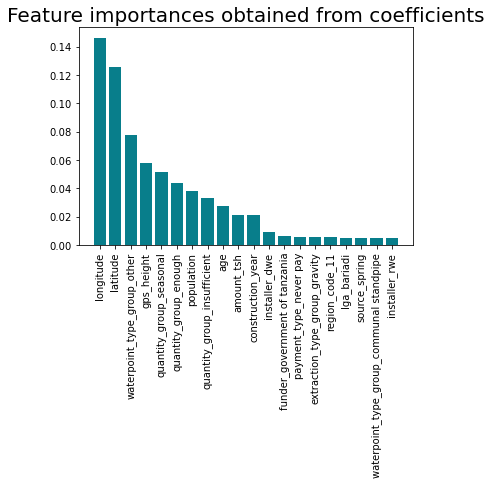

In [ ]:
plt.bar(x=importance[0:20]['Features'], height=importance[0:20]['Imp'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#from sklearn.model_selection import GridSearchCV

#param_grid = {
#    'n_estimators' : [301,401,501],
#    'max_depth' : [11,21,31],    
#    'max_features' : ['sqrt','log2']
#}

#cv = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
#cv.fit(X_train, y_train.values.ravel())

In [ ]:
#rf_bst = RandomForestClassifier(n_estimators=1000, n_jobs=-1,max_depth=10000, max_features='log2', bootstrap=False, criterion='gini')
#rf_bst.fit(X_train, y_train)
#y_predict_bst = rf_bst.predict(X_test)



In [ ]:
#train on whole set
#vote.fit(X,df_trainlabel['status_group'])

In [ ]:
sub_label=catb.predict(sub_X)

In [ ]:
sub_label.shape
sub_label

(14850, 1)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]], dtype=int64)

In [ ]:
output=pd.DataFrame({'id': df_testvalue['id'].ravel(), 'status_group': sub_label.ravel()})
output.head()

,id,status_group
0,50785,0
1,51630,0
2,17168,0
3,45559,1
4,49871,0


In [ ]:
target_status_group2 = {0:'functional', 
                   1:'non functional', 
                   2:'functional needs repair'} 
output['status_group'] = output['status_group'].replace(target_status_group2)
output['status_group'].value_counts()

functional                 9270
non functional             5136
functional needs repair     444
Name: status_group, dtype: int64

In [ ]:
output.to_csv('submission_v6_shifat_11nov.csv',index=False)